In [1]:
import rasterio as rs
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd
from fiona.crs import from_epsg
import matplotlib.pyplot as plt
from matplotlib import colors
import json

In [2]:
rastered = rs.open(r'data/GHS/GHS_BUILT_LDSMT_GLOBE_R2018A_3857_30_V2_0_5_8.tif')
region = [-105.324, -104.974, 39.807, 40.234]
bounding = box(region[0], region[2], region[1], region[3])
gdf = gpd.GeoDataFrame({'geometry': bounding}, index=[0], crs=from_epsg(4326))
gdf = gdf.to_crs(crs=rastered.crs.data)
to_rs = lambda dataframe : [json.loads(dataframe.to_json())['features'][0]['geometry']]
bbox = to_rs(gdf)
output, _ = mask(rastered, shapes=bbox, crop=True)

C:\Users\fac_pisel\Anaconda3\envs\datascience\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


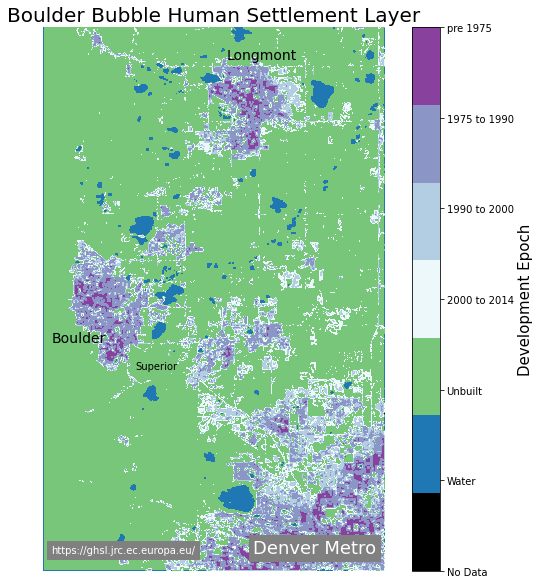

In [3]:
fig, ax = plt.subplots(1, figsize=(10,10))
levels = [0,1,2,3,4,5,6,7]
clrs = [
'#000000',
'#1f78b4',
'#78c679',
'#edf8fb',
'#b3cde3',
'#8c96c6',
'#88419d',]
    
cmap, norm = colors.from_levels_and_colors(levels, clrs)
image_hidden = ax.imshow(output[0], cmap=cmap)
cb = fig.colorbar(image_hidden, ax=ax)
cb.set_ticks(ticks=range(8))
cb.set_ticklabels(['No Data', 'Water', 'Unbuilt', '2000 to 2014', '1990 to 2000', '1975 to 1990', 'pre 1975'])
cb.set_label('Development Epoch', fontsize=15)
ax.text(30, 1200, "Boulder", fontsize=14, color='black')
ax.text(700, 120, "Longmont", fontsize=14, color='black')
ax.text(350, 1300, "Superior", fontsize=10, color='black')
ax.text(800, 2000, "Denver Metro", fontsize=18, color='white', backgroundcolor='gray')
ax.text(30, 2000, 'https://ghsl.jrc.ec.europa.eu/', fontsize=10, color='white', backgroundcolor='gray')
ax.set_axis_off()
ax.set_title("Boulder Bubble Human Settlement Layer", fontsize=20)
show(output,cmap=cmap,norm=norm,interpolation='bilinear', ax=ax)
plt.savefig('Day_23.png')


0 = no data
1 = water surface
2 = land no built-up in any epoch
3 = built-up from 2000 to 2014 epochs
4 = built-up from 1990 to 2000 epochs
5 = built-up from 1975 to 1990 epochs
6 = built-up up to 1975 epoch